# K Nearest Neighbours

## Import Required Libraries

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn
from sklearn.datasets import load_breast_cancer

## Importing Dataset

In [32]:
dataset = load_breast_cancer()
data = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Check for any null values

In [33]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Assign Dependent and Independent Variables

In [34]:
x = dataset.data
y = dataset.target

## Splitting the Dataset into Training and Testing

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape )

(398, 30)

(171, 30)

(398,)

(171,)

## Preprocessing the data with StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Training the Model using KNN (minkowski)

In [37]:
result = []
from sklearn.metrics import classification_report

for i in [1, 2, 3, 4, 5]:
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Accuracy_score = metrics.accuracy_score(y_test, y_pred)
    result.append(Accuracy_score)

    print(f"\nKNN (minkowski) for {i} neighbours")
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("Accuracy Score:", Accuracy_score)
    print("Accuracy in Percentage:", int(Accuracy_score * 100), '%')
    print(classification_report(y_test, y_pred))

print("\nAccuracies for each k:", result)


KNN (minkowski) for 1 neighbours
Confusion Matrix:
 [[ 58   5]
 [  3 105]]
Accuracy Score: 0.9532163742690059
Accuracy in Percentage: 95 %
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


KNN (minkowski) for 2 neighbours
Confusion Matrix:
 [[ 59   4]
 [  4 104]]
Accuracy Score: 0.9532163742690059
Accuracy in Percentage: 95 %
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


KNN (minkowski) for 3 neighbours
Confusion Matrix:
 [[ 59   4]
 [

## Evaluation Metrics

[Text(0.5, 1.0, 'KNN [minkowski, neighbor=5 ]')]

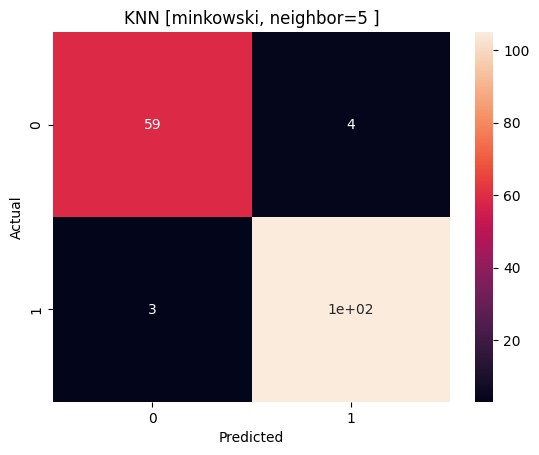

In [38]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
sn.heatmap(conf_matrix,annot=True).set(title='KNN [minkowski, neighbor=5 ]')